In [1]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [2]:
# load dataset
dataframe = pandas.read_excel(r"C:\Users\math\Desktop\anawork\scada\scadadata5.xls", header=None)
dataset = dataframe.values
X = dataset[:,0:3].astype(float)
Y = dataset[:,3]

In [3]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [52]:
# define baseline model
def baseline_model():
# create model
	model = Sequential()
	model.add(Dense(45, input_dim=3, activation='relu'))
	model.add(Dense(20, activation='softmax'))
# Compile model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	model.compile(loss='mse', optimizer='adam', metrics=['mae'])
#    'categorical_crossentropy' 'mse'
	return model

In [58]:
#import seaborn as sns
#sns.lineplot(data=results)
#print(results.shape)
import matplotlib.pyplot as plt
plotmodel= baseline_model()
history = plotmodel.fit(X, dummy_y, epochs=150, batch_size=50, verbose=0)
#history = plotmodel.fit(X, dummy_y, epochs=500, batch_size=len(X), verbose=2)
#pyplot.plot(history.history['mean_squared_error'])
#pyplot.plot(history.history['mean_absolute_error'])
#pyplot.plot(history.history['mean_absolute_percentage_error'])
#pyplot.plot(history.history['cosine_proximity'])
#pyplot.show()

In [59]:
print(history.history.keys())

dict_keys(['loss', 'mae'])


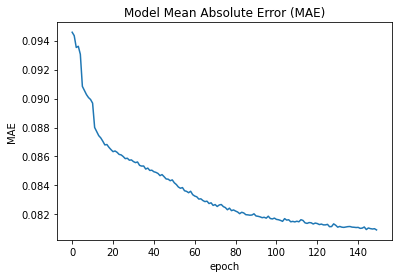

In [60]:
plt.plot(history.history['mae'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

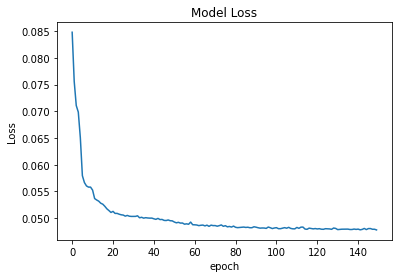

In [61]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
import numpy as np
print(np.mean(history.history['loss']))
print(np.mean(history.history['mae']))

0.05003522778550784
0.08366949751973152
